In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
pd.set_option('display.max_columns', None)
drive.mount('/drive')

Mounted at /drive


In [ ]:

df = pd.read_csv('../drive/Shared drives/FI Consulting (Business Analytics)/hmda_22_sample.csv')
df.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,549300NOCASXPA34X033,19124,TX,48113.0,4.811302e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,5,2,1,1,2,2,2,2,15000,NaN,0.0,NaN,2,0.0,NaN,0.0,NaN,NaN,36.0,NaN,NaN,2,2,2,2,355000.0,1,1,3,5,1,NaN,NaN,NaN,9,9,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,8888,8888,NaN,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,8361,76.01,97400,80.0,1376,2031,18
1,2022,254900LEJ4HP6RMWD374,14540,KY,21227.0,2.122701e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,2,1,2,2,2,1,2,95000,94.6,5.0,NaN,2,NaN,0.0,NaN,NaN,NaN,120,NaN,NaN,1,1,2,2,275000,1,1,3,5,1,NaN,85.0,20%-<30%,8,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,1,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1,4,2,5,1,4,25-34,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7759,22.19,70200,132.0,1741,2427,28
2,2022,549300E2UX99HKDBR481,11244,CA,6059.0,6.059022e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,5,0,2,1,31,1,2,2,2,295000,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,2,2,2,2,NaN,1,1,3,5,1,NaN,180.0,NaN,9,9,3.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,3,5,2,4,65-74,9999,Yes,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3665,40.71,119100,163.0,980,1065,37
3,2022,5493001GDRY0EL7VG372,16700,SC,45019.0,4.501901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,71,2,1,1,1,2,2,2,575000,69.634,4.375,0.587,2,4257.8,NaN,1250.0,NaN,NaN,360,NaN,NaN,2,2,2,2,815000,1,1,3,5,1,NaN,139.0,30%-<36%,3,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,35-44,9999,No,NaN,1,1,1,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3111,50.69,96400,72.0,1036,1483,27
4,2022,QFROUN1UWUYU0DVIWD51,24340,MI,26139.0,2.613902e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hisp

## Below are the columns we will use as predictors for the Approved/Denied Model

In [ ]:
columns_to_keep = ['derived_loan_product_type', 'derived_dwelling_category', 'derived_ethnicity', 'derived_race', 'derived_sex',
                   'action_taken', 'purchaser_type', 'loan_type', 'loan_purpose', 'loan_amount', 'combined_loan_to_value_ratio',
                'loan_term', 'property_value', 'income', 'debt_to_income_ratio', 'applicant_age']

df = df[columns_to_keep]

In [ ]:
df.head()

,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,loan_type,loan_purpose,loan_amount,combined_loan_to_value_ratio,loan_term,property_value,income,debt_to_income_ratio,applicant_age
0,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,5,1,1,15000,NaN,36.0,355000.0,NaN,NaN,8888
1,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,1,2,95000,94.6,120,275000,85.0,20%-<30%,25-34
2,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,5,0,1,31,295000,NaN,96.0,NaN,180.0,NaN,65-74
3,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,71,1,1,575000,69.634,360,815000,139.0,30%-<36%,35-44
4,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,0,1,31,125000,40.537,120,NaN,80.0,>60%,55-64


## Let's start with taking a quick description of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608021 entries, 0 to 1608020
Data columns (total 16 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   derived_loan_product_type     1608021 non-null  object 
 1   derived_dwelling_category     1608021 non-null  object 
 2   derived_ethnicity             1608021 non-null  object 
 3   derived_race                  1608021 non-null  object 
 4   derived_sex                   1608021 non-null  object 
 5   action_taken                  1608021 non-null  int64  
 6   purchaser_type                1608021 non-null  int64  
 7   loan_type                     1608021 non-null  int64  
 8   loan_purpose                  1608021 non-null  int64  
 9   loan_amount                   1608021 non-null  int64  
 10  combined_loan_to_value_ratio  1079788 non-null  object 
 11  loan_term                     1581287 non-null  object 
 12  property_value              

In [ ]:
# Dataset Dimesions
print('Dataset Dimensions:', df.shape)

Dataset Dimensions: (1608021, 16)


## Action Taken - Traget Variable

In [ ]:
# This model will focus on the approved loan status data. Let's take a look at the distribution of the loan status.
# Calculate the value counts
unique_values_counts = df['action_taken'].value_counts()

total_values = unique_values_counts.sum()
percentage_values = (unique_values_counts / total_values) * 100
counts_and_percentages = pd.DataFrame({'Count': unique_values_counts, 'Percentage': percentage_values})

print(counts_and_percentages)

    Count  Percentage
1  839769   52.223758
3  249714   15.529275
4  221858   13.796959
6  155562    9.674127
5   79249    4.928356
2   41705    2.593561
8   12973    0.806768
7    7191    0.447196


### The only numerical values relevant to this model will be 1, 2, 3. These are the meanings of the numerical values:
* 1 - Loan originated
* 2 - Application approved but not accepted
* 3 - Application denied

In [ ]:
# Keep only rows where action_taken is 1, 2, or 3
df = df[df['action_taken'].isin([1, 2, 3])]

# Merge the number 1 and 2 values in the action_taken column into a single value (1)
df['action_taken'] = df['action_taken'].replace(2, 1)

# Calculate the distribution of the loan status after filtering and merging
unique_values_counts = df['action_taken'].value_counts()
total_values = unique_values_counts.sum()
percentage_values = (unique_values_counts / total_values) * 100
counts_and_percentages = pd.DataFrame({'Count': unique_values_counts, 'Percentage': percentage_values})

# Display the counts and percentages
print(counts_and_percentages)


    Count  Percentage
1  881474   77.924624
3  249714   22.075376


# Prepare the Data for Machine Learning

## Clean the Data

### 1. Missing Values

In [ ]:
# Find missing values
missing_values = df.isnull().sum()
print(missing_values)

derived_loan_product_type           0
derived_dwelling_category           0
derived_ethnicity                   0
derived_race                        0
derived_sex                         0
action_taken                        0
purchaser_type                      0
loan_type                           0
loan_purpose                        0
loan_amount                         0
combined_loan_to_value_ratio    73002
loan_term                       20101
property_value                  30696
income                          51765
debt_to_income_ratio            63548
applicant_age                       0
dtype: int64


### Combined Loan to Value Ratio

In [ ]:
# Combined Loan to Value Ratio

# Convert 'combined_loan_to_value_ratio' to numeric, coercing any errors to NaN
df['combined_loan_to_value_ratio'] = pd.to_numeric(df['combined_loan_to_value_ratio'], errors='coerce')

# Summary statistics for 'combined_loan_to_value_ratio' after conversion
summary = df['combined_loan_to_value_ratio'].describe()
print(summary)

count    1.032272e+06
mean     1.130976e+02
std      2.844581e+04
min      5.000000e-03
25%      6.007000e+01
50%      7.799000e+01
75%      9.000000e+01
max      2.300000e+07
Name: combined_loan_to_value_ratio, dtype: float64


In [ ]:
# Using the median for imputation to minimize the impact of outliers
# Filling missing values in 'combined_loan_to_value_ratio' with its median
median = df['combined_loan_to_value_ratio'].median()
df['combined_loan_to_value_ratio'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['combined_loan_to_value_ratio'].isnull().sum()
print(missing_values_cltv_after)

0


### Loan Term

In [ ]:
# Convert 'loan_term' to float to accommodate both integers and float representations
df['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')

# Summary statistics for 'loan_term' after conversion
summary = df['loan_term'].describe()
print(summary)

count    1.085209e+06
mean     3.192050e+02
std      8.412950e+01
min      1.000000e+00
25%      3.000000e+02
50%      3.600000e+02
75%      3.600000e+02
max      1.827000e+03
Name: loan_term, dtype: float64


In [ ]:
# Impute missing 'loan_term' values with the median
median = df['loan_term'].median()
df['loan_term'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['loan_term'].isnull().sum()
print(missing_values_cltv_after)

0


### Property Value

In [ ]:
# Convert 'property_value' to float to accommodate both integers and float representations
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce')

# Summary statistics for 'loan_term' after conversion
summary = df['property_value'].describe()
print(summary)

count    1.074509e+06
mean     5.695005e+05
std      3.839118e+06
min      5.000000e+03
25%      2.450000e+05
50%      3.750000e+05
75%      5.850000e+05
max      2.147484e+09
Name: property_value, dtype: float64


In [ ]:
# Impute missing 'property_value' values with the median
median = df['property_value'].median()
df['property_value'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['property_value'].isnull().sum()
print(missing_values_cltv_after)

0


### Income

In [ ]:
# Convert 'income' to float to accommodate both integers and float representations
df['income'] = pd.to_numeric(df['income'], errors='coerce')

# Summary statistics for 'loan_term' after conversion
summary = df['income'].describe()
print(summary)

count    1.079423e+06
mean     1.523096e+02
std      5.036850e+03
min     -1.330000e+05
25%      6.100000e+01
50%      9.500000e+01
75%      1.500000e+02
max      3.690126e+06
Name: income, dtype: float64


In [ ]:
# Impute missing 'income' values with the median
median = df['income'].median()
df['income'].fillna(median, inplace=True)

# Checking if the missing values are filled
missing_values_cltv_after = df['income'].isnull().sum()
print(missing_values_cltv_after)

0


### Debt to Income Ratio

In [ ]:
# Assuming your DataFrame is named 'df'
df.dropna(subset=['debt_to_income_ratio'], inplace=True)


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

derived_loan_product_type       0
derived_dwelling_category       0
derived_ethnicity               0
derived_race                    0
derived_sex                     0
action_taken                    0
purchaser_type                  0
loan_type                       0
loan_purpose                    0
loan_amount                     0
combined_loan_to_value_ratio    0
loan_term                       0
property_value                  0
income                          0
debt_to_income_ratio            0
applicant_age                   0
dtype: int64


In [ ]:
df.shape

(1067640, 16)

### Let's examine the unique values of the categorical data before encoding

In [ ]:
# count values for derived_loan_product_type
df['derived_loan_product_type'].value_counts()

Conventional:First Lien          662194
Conventional:Subordinate Lien    226045
FHA:First Lien                   106632
VA:First Lien                     65956
FSA/RHS:First Lien                 6567
FSA/RHS:Subordinate Lien            146
FHA:Subordinate Lien                 96
VA:Subordinate Lien                   4
Name: derived_loan_product_type, dtype: int64

In [ ]:
# List of values to be removed
values_to_drop = [
    "FSA/RHS:First Lien",
    "FSA/RHS:Subordinate Lien",
    "FHA:Subordinate Lien",
    "VA:Subordinate Lien"
]

# Drop rows where 'derived_loan_product_type' contains any of the specified values
df = df[~df['derived_loan_product_type'].isin(values_to_drop)]

df['derived_loan_product_type'].value_counts()


Conventional:First Lien          662194
Conventional:Subordinate Lien    226045
FHA:First Lien                   106632
VA:First Lien                     65956
Name: derived_loan_product_type, dtype: int64

### Derived Dwelling Category

In [ ]:
df['derived_dwelling_category'].value_counts()

Single Family (1-4 Units):Site-Built      1010719
Single Family (1-4 Units):Manufactured      48853
Multifamily:Site-Built                       1215
Multifamily:Manufactured                       40
Name: derived_dwelling_category, dtype: int64

In [ ]:
# List of values to be removed
values_to_drop = [
    "Multifamily:Site-Built",
    "Multifamily:Manufactured",
]

# Drop rows where 'derived_loan_product_type' contains any of the specified values
df = df[~df['derived_dwelling_category'].isin(values_to_drop)]

df['derived_dwelling_category'].value_counts()

Single Family (1-4 Units):Site-Built      1010719
Single Family (1-4 Units):Manufactured      48853
Name: derived_dwelling_category, dtype: int64

In [ ]:
df.head()

,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,loan_type,loan_purpose,loan_amount,combined_loan_to_value_ratio,loan_term,property_value,income,debt_to_income_ratio,applicant_age
1,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,1,2,95000,94.600,120.0,275000.0,85.0,20%-<30%,25-34
3,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,71,1,1,575000,69.634,360.0,815000.0,139.0,30%-<36%,35-44
4,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,0,1,31,125000,40.537,120.0,375000.0,80.0,>60%,55-64
5,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,0,1,1,1165000,80.000,360.0,1455000.0,479.0,20%-<30%,45-54
6,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Joint,1,0,1,4,255000,18.041,360.0,1385000.0,135.0,47,55-64


### Derived Ethnicity

In [ ]:
df['derived_ethnicity'].value_counts()

Not Hispanic or Latino     764177
Ethnicity Not Available    164052
Hispanic or Latino         112997
Joint                       25915
Free Form Text Only           499
Name: derived_ethnicity, dtype: int64

In [ ]:
# List of values to be removed
values_to_drop = [
    "Free Form Text Only",
]

# Drop rows where 'derived_loan_product_type' contains any of the specified values
df = df[~df['derived_ethnicity'].isin(values_to_drop)]

df['derived_ethnicity'].value_counts()

Not Hispanic or Latino     764177
Ethnicity Not Available    164052
Hispanic or Latino         112997
Joint                       25915
Name: derived_ethnicity, dtype: int64

### Derived Race

In [ ]:
df['derived_race'].value_counts()

White                                        704302
Race Not Available                           177193
Black or African American                     88038
Asian                                         63064
Joint                                         22781
American Indian or Alaska Native               6653
Native Hawaiian or Other Pacific Islander      2636
2 or more minority races                       2298
Free Form Text Only                             176
Name: derived_race, dtype: int64

In [ ]:
# List of values to be removed
values_to_drop = [
    "Free Form Text Only",
]

# Drop rows where 'derived_loan_product_type' contains any of the specified values
df = df[~df['derived_race'].isin(values_to_drop)]

df['derived_race'].value_counts()

White                                        704302
Race Not Available                           177193
Black or African American                     88038
Asian                                         63064
Joint                                         22781
American Indian or Alaska Native               6653
Native Hawaiian or Other Pacific Islander      2636
2 or more minority races                       2298
Name: derived_race, dtype: int64

### Derived Sex

In [ ]:
df['derived_sex'].value_counts()

Joint                383589
Male                 357727
Female               239883
Sex Not Available     85766
Name: derived_sex, dtype: int64

### Loan Term

In [ ]:
df['loan_term'].value_counts()

360.0    779955
180.0     80848
240.0     57248
300.0     55638
120.0     35989
          ...  
251.0         1
8.0           1
409.0         1
477.0         1
91.0          1
Name: loan_term, Length: 372, dtype: int64

In [ ]:
# Define the frequency threshold
frequency_threshold = 5000

# Calculate value counts and filter based on the threshold
common_loan_terms = df['loan_term'].value_counts()
common_loan_terms = common_loan_terms[common_loan_terms > frequency_threshold]

# Keep only rows in df with loan terms that are above the frequency threshold
df = df[df['loan_term'].isin(common_loan_terms.index)]


In [ ]:
df['loan_term'].value_counts()

360.0    772088
180.0     80822
240.0     57208
300.0     55635
120.0     35945
480.0     14869
60.0       9664
276.0      6070
Name: loan_term, dtype: int64

### Debt to Income Ratio

In [ ]:
df['debt_to_income_ratio'].value_counts()

20%-<30%    165397
30%-<36%    154418
50%-60%      87273
<20%         72588
>60%         63666
44           42017
42           39877
49           37386
41           35887
43           35598
40           34251
39           33876
38           31585
37           30848
45           30520
36           29495
48           28682
47           27343
46           27108
Exempt       24486
Name: debt_to_income_ratio, dtype: int64

### Aplicant Age

In [ ]:
df['applicant_age'].value_counts()

35-44    260796
45-54    225797
25-34    203760
55-64    174476
65-74     97585
>74       34699
<25       31085
8888       4103
Name: applicant_age, dtype: int64

### Purchaser Type

In [ ]:
df['purchaser_type'].value_counts()

0     559235
1     136120
3     107649
71     76286
2      73712
6      38788
9      23281
8       8901
5       5434
72      2893
4          2
Name: purchaser_type, dtype: int64

### Loan Type

In [ ]:
df['loan_type'].value_counts()

1    860697
2    106048
3     65556
Name: loan_type, dtype: int64

### Loan Purpose

In [ ]:
df['loan_purpose'].value_counts()

1     486395
32    203978
31    121010
2     120017
4     100852
5         49
Name: loan_purpose, dtype: int64

In [ ]:
df.head(10)

,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,loan_type,loan_purpose,loan_amount,combined_loan_to_value_ratio,loan_term,property_value,income,debt_to_income_ratio,applicant_age
1,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,0,1,2,95000,94.600,120.0,275000.0,85.0,20%-<30%,25-34
3,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,71,1,1,575000,69.634,360.0,815000.0,139.0,30%-<36%,35-44
4,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,0,1,31,125000,40.537,120.0,375000.0,80.0,>60%,55-64
5,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,0,1,1,1165000,80.000,360.0,1455000.0,479.0,20%-<30%,45-54
6,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Joint,1,0,1,4,255000,18.041,360.0,1385000.0,135.0,47,55-64
7,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,1,1,32,295000,79.000,360.0,375000.0,156.0,42,45-54
8,VA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,3,0,3,32,125000,90.000,360.0,145000.0,67.0,30%-<36%,25-34
9,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,White,Female,1,1,1,1,205000,80.000,360.0,255000.0,82.0,38,65-74
11,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Joint,1,0,2,1,225000,94.541,360.0,225000.0,66.0,50%-60%,25-34
13,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,1,1,32,205000,43.685,360.0,475000.0,58.0,38,45-54


## Encode categorical Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your original dataframe and you've listed your nominal columns
nominal_columns = ['derived_loan_product_type', 'derived_dwelling_category',
                   'derived_ethnicity', 'derived_race', 'derived_sex',
                   'purchaser_type', 'loan_type', 'loan_purpose', 'loan_term',
                   'applicant_age', 'debt_to_income_ratio',]

# One-hot encode the nominal columns
df_encoded = pd.get_dummies(df, columns=nominal_columns)

# Encode the 'action_taken' column: 1 -> 0, 3 -> 1
df_encoded['action_taken_encoded'] = df_encoded['action_taken'].map({1: 0, 3: 1})

df_encoded.drop(['action_taken'], axis=1, inplace=True)


In [ ]:
df_encoded.head()

,loan_amount,combined_loan_to_value_ratio,property_value,income,derived_loan_product_type_Conventional:First Lien,derived_loan_product_type_Conventional:Subordinate Lien,derived_loan_product_type_FHA:First Lien,derived_loan_product_type_VA:First Lien,derived_dwelling_category_Single Family (1-4 Units):Manufactured,derived_dwelling_category_Single Family (1-4 Units):Site-Built,derived_ethnicity_Ethnicity Not Available,derived_ethnicity_Hispanic or Latino,derived_ethnicity_Joint,derived_ethnicity_Not Hispanic or Latino,derived_race_2 or more minority races,derived_race_American Indian or Alaska Native,derived_race_Asian,derived_race_Black or African American,derived_race_Joint,derived_race_Native Hawaiian or Other Pacific Islander,derived_race_Race Not Available,derived_race_White,derived_sex_Female,derived_sex_Joint,derived_sex_Male,derived_sex_Sex Not Available,purchaser_type_0,purchaser_type_1,purchaser_type_2,purchaser_type_3,purchaser_type_4,purchaser_type_5,purchaser_type_6,purchaser_type_8,purchaser_type_9,purchaser_type_71,purchaser_type_72,loan_type_1,loan_type_2,loan_type_3,loan_purpose_1,loan_purpose_2,loan_purpose_4,loan_purpose_5,loan_purpose_31,loan_purpose_32,loan_term_60.0,loan_term_120.0,loan_term_180.0,loan_term_240.0,loan_term_276.0,loan_term_300.0,loan_term_360.0,loan_term_480.0,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_8888,applicant_age_<25,applicant_age_>74,debt_to_income_ratio_20%-<30%,debt_to_income_ratio_30%-<36%,debt_to_income_ratio_36,debt_to_income_ratio_37,debt_to_income_ratio_38,debt_to_income_ratio_39,debt_to_income_ratio_40,debt_to_income_ratio_41,debt_to_income_ratio_42,debt_to_income_ratio_43,debt_to_income_ratio_44,debt_to_income_ratio_45,debt_to_income_ratio_46,debt_to_income_ratio_47,debt_to_income_ratio_48,debt_to_income_ratio_49,debt_to_income_ratio_50%-60%,debt_to_income_ratio_<20%,debt_to_income_ratio_>60%,debt_to_income_ratio_Exempt,action_taken_encoded
1,95000,94.600,275000.0,85.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,575000,69.634,815000.0,139.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,125000,40.537,375000.0,80.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,1165000,80.000,1455000.0,479.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,255000,18.041,1385000.0,135.0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_encoded.shape

(1032301, 83)

## Numerical Data Scaling

In [ ]:
# Identify numerical columns (example)
numerical_cols = ['loan_amount', 'combined_loan_to_value_ratio', 'property_value', 'income']

# Apply scaling to numerical columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [ ]:
df_encoded.head()

,loan_amount,combined_loan_to_value_ratio,property_value,income,derived_loan_product_type_Conventional:First Lien,derived_loan_product_type_Conventional:Subordinate Lien,derived_loan_product_type_FHA:First Lien,derived_loan_product_type_VA:First Lien,derived_dwelling_category_Single Family (1-4 Units):Manufactured,derived_dwelling_category_Single Family (1-4 Units):Site-Built,derived_ethnicity_Ethnicity Not Available,derived_ethnicity_Hispanic or Latino,derived_ethnicity_Joint,derived_ethnicity_Not Hispanic or Latino,derived_race_2 or more minority races,derived_race_American Indian or Alaska Native,derived_race_Asian,derived_race_Black or African American,derived_race_Joint,derived_race_Native Hawaiian or Other Pacific Islander,derived_race_Race Not Available,derived_race_White,derived_sex_Female,derived_sex_Joint,derived_sex_Male,derived_sex_Sex Not Available,purchaser_type_0,purchaser_type_1,purchaser_type_2,purchaser_type_3,purchaser_type_4,purchaser_type_5,purchaser_type_6,purchaser_type_8,purchaser_type_9,purchaser_type_71,purchaser_type_72,loan_type_1,loan_type_2,loan_type_3,loan_purpose_1,loan_purpose_2,loan_purpose_4,loan_purpose_5,loan_purpose_31,loan_purpose_32,loan_term_60.0,loan_term_120.0,loan_term_180.0,loan_term_240.0,loan_term_276.0,loan_term_300.0,loan_term_360.0,loan_term_480.0,applicant_age_25-34,applicant_age_35-44,applicant_age_45-54,applicant_age_55-64,applicant_age_65-74,applicant_age_8888,applicant_age_<25,applicant_age_>74,debt_to_income_ratio_20%-<30%,debt_to_income_ratio_30%-<36%,debt_to_income_ratio_36,debt_to_income_ratio_37,debt_to_income_ratio_38,debt_to_income_ratio_39,debt_to_income_ratio_40,debt_to_income_ratio_41,debt_to_income_ratio_42,debt_to_income_ratio_43,debt_to_income_ratio_44,debt_to_income_ratio_45,debt_to_income_ratio_46,debt_to_income_ratio_47,debt_to_income_ratio_48,debt_to_income_ratio_49,debt_to_income_ratio_50%-60%,debt_to_income_ratio_<20%,debt_to_income_ratio_>60%,debt_to_income_ratio_Exempt,action_taken_encoded
1,-0.541337,-0.000076,-0.103483,-0.013646,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.868754,-0.001178,0.139080,-0.002412,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.453207,-0.002464,-0.058564,-0.014686,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5,2.601991,-0.000721,0.426563,0.068321,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-0.071307,-0.003458,0.395119,-0.003244,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032301 entries, 1 to 1608019
Data columns (total 83 columns):
 #   Column                                                            Non-Null Count    Dtype  
---  ------                                                            --------------    -----  
 0   loan_amount                                                       1032301 non-null  float64
 1   combined_loan_to_value_ratio                                      1032301 non-null  float64
 2   property_value                                                    1032301 non-null  float64
 3   income                                                            1032301 non-null  float64
 4   derived_loan_product_type_Conventional:First Lien                 1032301 non-null  uint8  
 5   derived_loan_product_type_Conventional:Subordinate Lien           1032301 non-null  uint8  
 6   derived_loan_product_type_FHA:First Lien                          1032301 non-null  uint8  
 7   derived_l

## Machine Learning Models

### 1. Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df_encoded.drop(['action_taken_encoded'], axis=1)
y = df_encoded['action_taken_encoded']

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred1 = logreg.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Print a detailed classification report
print(classification_report(y_test, y_pred1))

Accuracy: 0.8727750035115591
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    161875
           1       0.78      0.57      0.66     44586

    accuracy                           0.87    206461
   macro avg       0.84      0.76      0.79    206461
weighted avg       0.87      0.87      0.86    206461



In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")


Sensitivity (Recall): 0.5673081236262504
Specificity: 0.9569111969111969
Positive Predictive Value (Precision): 0.7838482754346277
Negative Predictive Value: 0.8892486451731423


### 2. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
tree_clf = DecisionTreeClassifier()

# Train the model on the training data
tree_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = tree_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred2))


Accuracy: 0.8456996720930345
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    161875
           1       0.64      0.65      0.64     44586

    accuracy                           0.85    206461
   macro avg       0.77      0.77      0.77    206461
weighted avg       0.85      0.85      0.85    206461



In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")


Sensitivity (Recall): 0.6483873861750326
Specificity: 0.900046332046332
Positive Predictive Value (Precision): 0.6411541617689459
Negative Predictive Value: 0.9028517958505813


### 3. Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred3 = rf_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred3))


Accuracy: 0.8849225761766145
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93    161875
           1       0.79      0.64      0.71     44586

    accuracy                           0.88    206461
   macro avg       0.85      0.80      0.82    206461
weighted avg       0.88      0.88      0.88    206461



In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")


Sensitivity (Recall): 0.6421073879693178
Specificity: 0.9518023166023166
Positive Predictive Value (Precision): 0.7858417281985123
Negative Predictive Value: 0.9061518555549021


### 4. XGBoost

In [ ]:
import re
import xgboost as xgb

# Function to clean column names to be XGBoost-compatible: alphanumeric and underscores only
def clean_column_names(columns):
    return [re.sub(r'\W+', '_', cname) for cname in columns]

# Clean your DataFrame column names
X.columns = clean_column_names(X.columns)

# If you've already split your data, make sure to apply the same to your training and test sets
X_train.columns = X.columns
X_test.columns = X.columns

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred4 = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred4)
class_report = classification_report(y_test, y_pred4)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)


Accuracy: 0.8906912201335846
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93    161875
           1       0.81      0.65      0.72     44586

    accuracy                           0.89    206461
   macro avg       0.86      0.80      0.83    206461
weighted avg       0.89      0.89      0.89    206461



In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")


Sensitivity (Recall): 0.6489481003005427
Specificity: 0.9572756756756757
Positive Predictive Value (Precision): 0.8070850767085077
Negative Predictive Value: 0.9082591392114224


### 5. mXGB

In [ ]:
import xgboost as xgb

monotone_constraints = (1, -1)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'max_depth': 3,
    'eta': 0.1,
    'monotone_constraints': monotone_constraints,
    'objective': 'reg:squarederror'  # Use 'binary:logistic' for classification tasks
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = bst.predict(dtest)

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

preds_binary = [1 if p > 0.5 else 0 for p in preds]

accuracy = accuracy_score(y_test, preds_binary)
class_report = classification_report(y_test, preds_binary)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.8738841718290622
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    161875
           1       0.82      0.53      0.65     44586

    accuracy                           0.87    206461
   macro avg       0.85      0.75      0.78    206461
weighted avg       0.87      0.87      0.86    206461



In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, preds_binary)
tn, fp, fn, tp = conf_matrix.ravel()

# Sensitivity or Recall
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Positive Predictive Value (Precision)
# This is also directly provided by classification_report under 'precision' for the positive class
positive_predictive_value = tp / (tp + fp)
print(f"Positive Predictive Value (Precision): {positive_predictive_value}")

# Negative Predictive Value
negative_predictive_value = tn / (tn + fn)
print(f"Negative Predictive Value: {negative_predictive_value}")

Sensitivity (Recall): 0.5324989907145741
Specificity: 0.9679135135135135
Positive Predictive Value (Precision): 0.8205004147083218
Negative Predictive Value: 0.8825855513307985


## Visual Interpretation

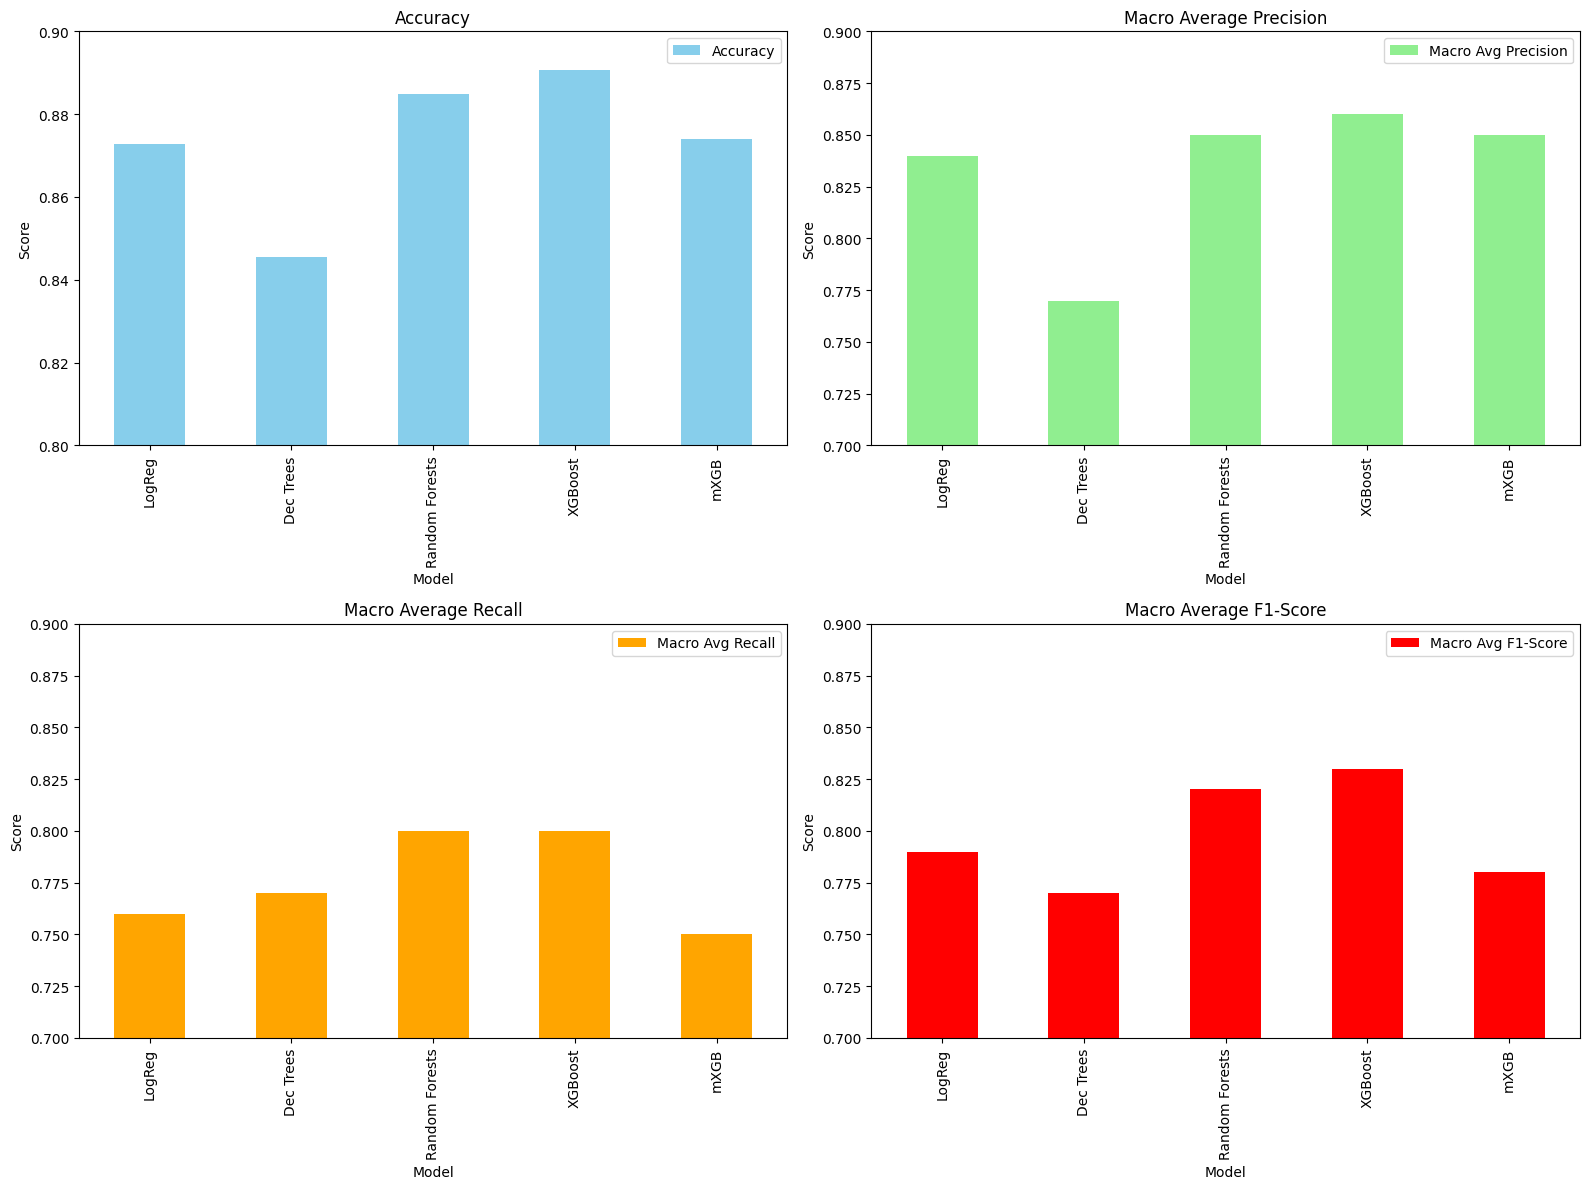

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

model_names = ['LogReg', 'Dec Trees', 'Random Forests', 'XGBoost', 'mXGB']
accuracies = [0.8727750035115591, 0.8454187473663307, 0.8848160185216578, 0.8906912201335846, 0.8738841718290622]
macro_avg_precisions = [0.84, 0.77, 0.85, 0.86, 0.85]
macro_avg_recalls = [0.76, 0.77, 0.80, 0.80, 0.75]
macro_avg_f1s = [0.79, 0.77, 0.82, 0.83, 0.78]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Macro Avg Precision': macro_avg_precisions,
    'Macro Avg Recall': macro_avg_recalls,
    'Macro Avg F1-Score': macro_avg_f1s
})

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

metrics_df.plot(x='Model', y='Accuracy', kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([0.8, 0.9])
axs[0, 0].set_ylabel('Score')

metrics_df.plot(x='Model', y='Macro Avg Precision', kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Macro Average Precision')
axs[0, 1].set_ylim([0.7, 0.9])
axs[0, 1].set_ylabel('Score')

metrics_df.plot(x='Model', y='Macro Avg Recall', kind='bar', ax=axs[1, 0], color='orange')
axs[1, 0].set_title('Macro Average Recall')
axs[1, 0].set_ylim([0.7, 0.9])
axs[1, 0].set_ylabel('Score')

metrics_df.plot(x='Model', y='Macro Avg F1-Score', kind='bar', ax=axs[1, 1], color='red')
axs[1, 1].set_title('Macro Average F1-Score')
axs[1, 1].set_ylim([0.7, 0.9])
axs[1, 1].set_ylabel('Score')

plt.tight_layout()
plt.show()


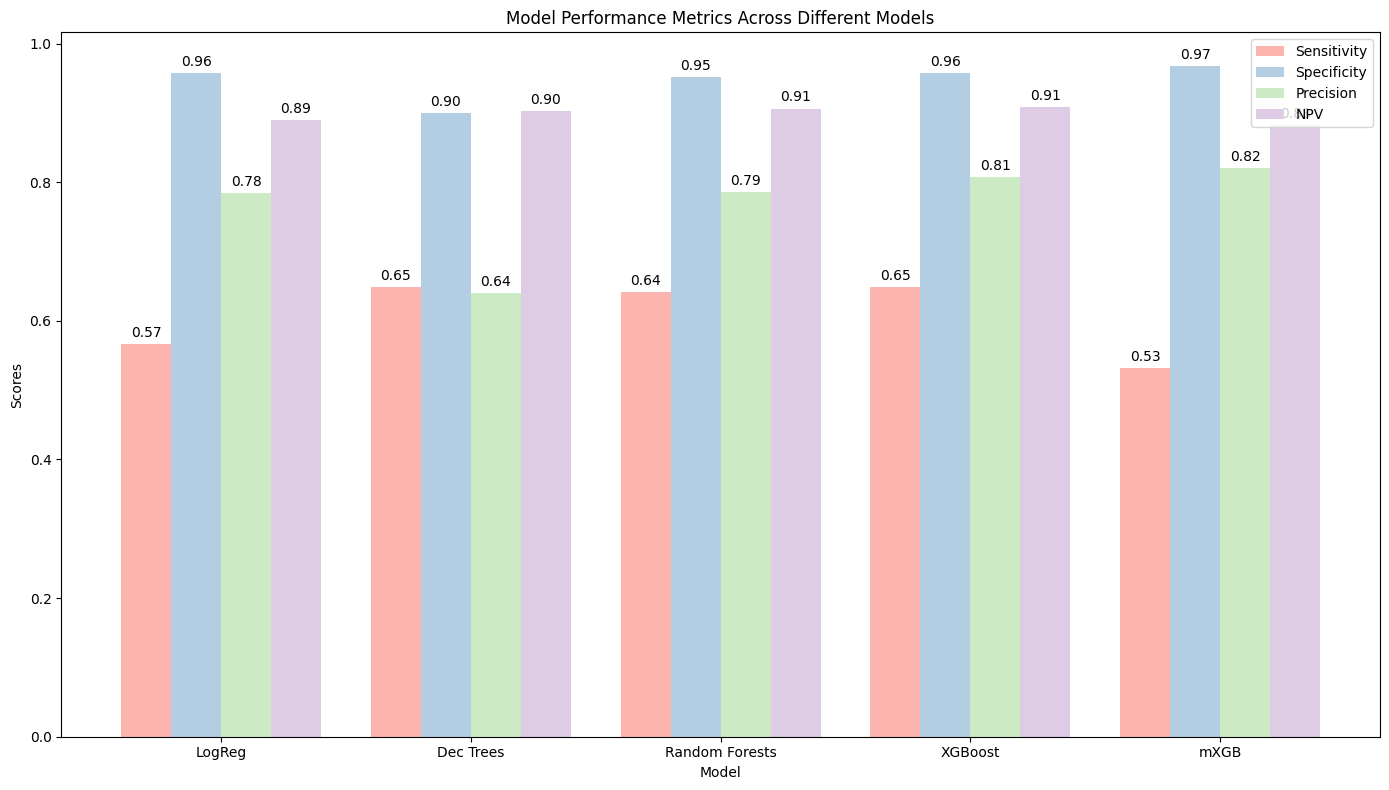

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and metrics
model_names = ['LogReg', 'Dec Trees', 'Random Forests', 'XGBoost', 'mXGB']
sensitivity = [0.5664, 0.6491, 0.6421, 0.6489, 0.5324]
specificity = [0.9570, 0.8997, 0.9518, 0.9573, 0.9679]
precision = [0.7841, 0.6406, 0.7858, 0.8071, 0.8205]
npv = [0.8891, 0.9030, 0.9062, 0.9083, 0.8825]

x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width*1.5, sensitivity, width, label='Sensitivity', color='#fbb4ae')
rects2 = ax.bar(x - width/2, specificity, width, label='Specificity', color='#b3cde3')
rects3 = ax.bar(x + width/2, precision, width, label='Precision', color='#ccebc5')
rects4 = ax.bar(x + width*1.5, npv, width, label='NPV', color='#decbe4')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Metrics Across Different Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

fig.tight_layout()

plt.show()


Considerations for Model Selection:
Accuracy and F1-Score: XGBoost has the highest accuracy and macro-average F1-score, indicating strong overall performance and a balanced handling of classes. Random Forests also show good performance but slightly lower than XGBoost.

Model Complexity and Interpretability: Logistic Regression provides a good balance between simplicity and performance, making it easier to understand the model's decisions. Decision Trees offer a visual representation of the decision-making process but with lower overall metrics.

XGBoost is the top performer based on the confusion matrix metrics shared. It excels in both identifying true positives (Sensitivity) and true negatives (Specificity), making accurate positive predictions (Precision), and accurately identifying negative cases (Negative Predictive Value).

Recommendation:
Based on the provided metrics, XGBoost appears to be the best performer in terms of the metrics above. It balances the trade-off between performance and complexity well, offering strong predictive capabilities across classes.